<a href="https://colab.research.google.com/github/valerio-unifei/UNIFEI-IA-Aulas/blob/main/UNIFEI_IA_02_Espa%C3%A7o_de_Busca_Clientes_Alvo_Shopping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clientes Alvo para Shopping

https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

**Contexto**

Esse conjunto de dados é criado apenas para fins de aprendizado dos conceitos de segmentação de clientes, também conhecida como análise de cesta de compras. 

**Objetivo**

Você está analisando a um shopping center e, por meio de cartões de sócio, tem alguns dados básicos sobre seus clientes, como ID do cliente, idade, sexo, renda anual e pontuação de gastos.

Pontuação de gastos é algo que você atribui ao cliente com base em seus parâmetros definidos, como comportamento do cliente e dados de compra.

**Problema**

Você é o dono do shopping e quer entender os clientes como quem pode convergir facilmente [Clientes-alvo] para que o sentido possa ser dado à equipe de marketing e planeje a estratégia de acordo.

# Bibliotecas

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style("darkgrid")

import warnings
warnings.filterwarnings("ignore")

print('Numpy versão:',np.__version__)
print('Pandas versão:',pd.__version__)
print('Seaborn versão:',sns.__version__)

Numpy versão: 1.19.5
Pandas versão: 1.1.5
Seaborn versão: 0.11.1


# Base de Dados (*DATASET*)

In [3]:
url = 'https://raw.githubusercontent.com/SteffiPeTaffy/machineLearningAZ/master/Machine%20Learning%20A-Z%20Template%20Folder/Part%204%20-%20Clustering/Section%2025%20-%20Hierarchical%20Clustering/Mall_Customers.csv'
clientDS = pd.read_csv(url)

print('(linhas, colunas) =', clientDS.shape)
print('Cabecalho =',clientDS.columns.values)

(linhas, colunas) = (200, 5)
Cabecalho = ['CustomerID' 'Genre' 'Age' 'Annual Income (k$)' 'Spending Score (1-100)']


**Descrição das colunas:**
* CustomerID - ID exclusivo atribuído ao cliente
* Genre - Gênero do cliente
* Age - Idade do cliente
* Annual Income (k$) - Renda anual do cliente
* Spending Score (1-100) - Pontuação atribuída pelo shopping com base no comportamento do cliente e natureza dos gastos

In [5]:
clientDS.head(10)

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [6]:
clientDS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
clientDS.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Modificando *Dataset* para Análise

In [8]:
# removendo coluna de identificador 'CustomerID'
clientDS = clientDS.drop(['CustomerID'],axis=1)
clientDS.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [9]:
clientDS['Genre'] = clientDS['Genre'].factorize()[0]
clientDS.head()

,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


# Analisando Dados

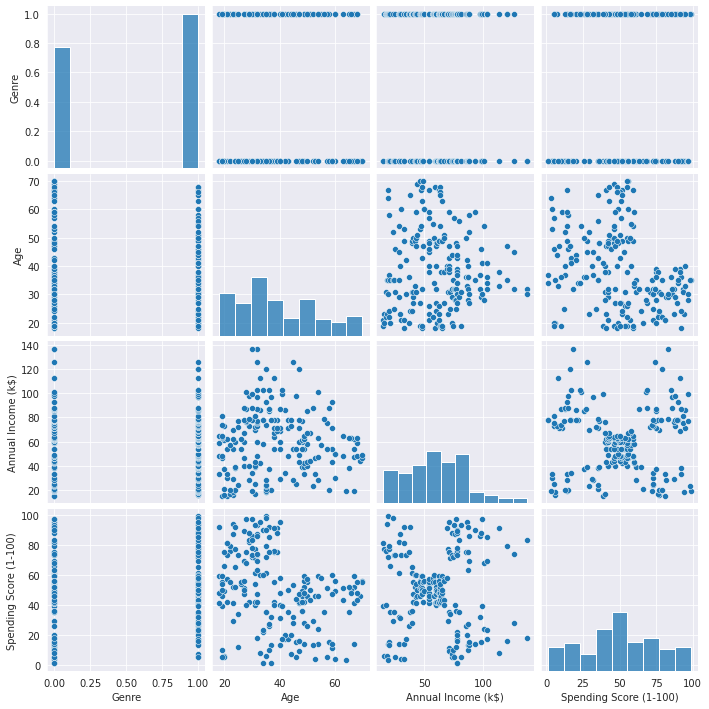

In [11]:
# analisando comportamento das colunas
import seaborn as sns
sns.pairplot(clientDS[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])

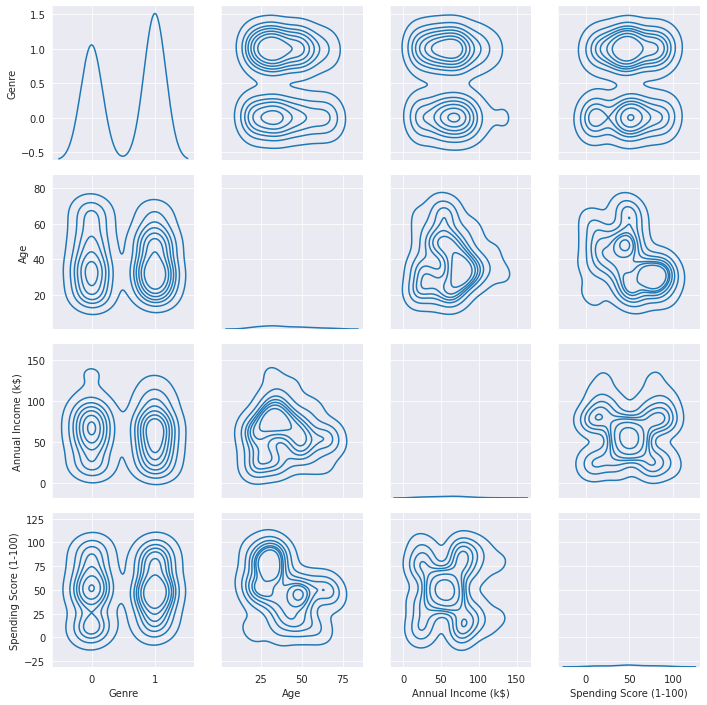

In [13]:
# distribuições dos pontos e densidades
g = sns.PairGrid(clientDS[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
g.map_diag(sns.kdeplot)
g.map_offdiag(sns.kdeplot, n_levels=8);